<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Olympic_Medals_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("teams.csv")

In [7]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [8]:
df = df[["country","year","athletes","age","medals","prev_medals"]]
df

,country,year,athletes,age,medals,prev_medals
0,Afghanistan,1964,8,22.0,0,0.0
1,Afghanistan,1968,5,23.2,0,0.0
2,Afghanistan,1972,8,29.0,0,0.0
3,Afghanistan,1980,11,23.6,0,0.0
4,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...
2139,Zimbabwe,2000,26,25.0,0,0.0
2140,Zimbabwe,2004,14,25.1,3,0.0
2141,Zimbabwe,2008,16,26.1,4,3.0
2142,Zimbabwe,2012,9,27.3,0,4.0


In [9]:
df = pd.read_csv("teams.csv")
df = df[["country","year","athletes","age","medals","prev_medals"]]
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
medals,1.000000
prev_medals,0.920048


In [10]:
import seaborn as sns

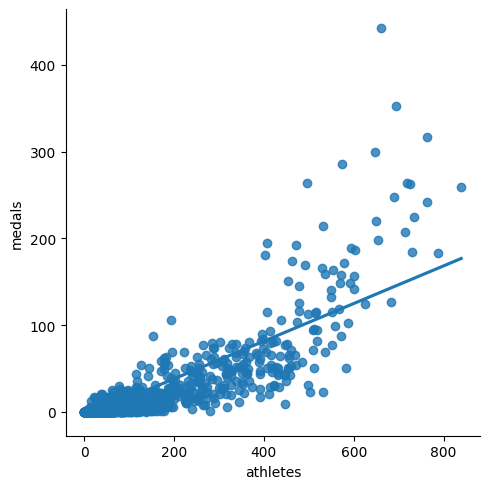

In [11]:
sns.lmplot(x="athletes", y="medals", data=df, fit_reg =True, ci=None)

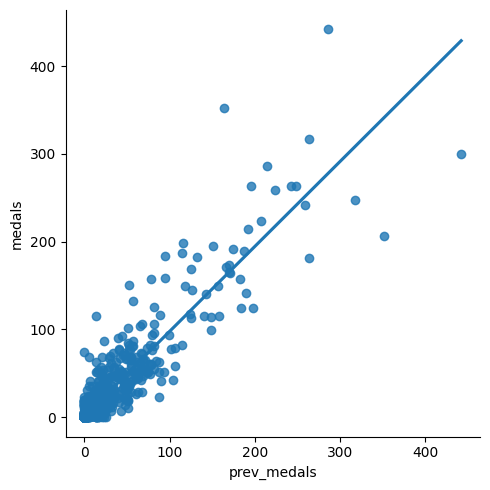

In [12]:
sns.lmplot(x="prev_medals", y="medals", data=df, fit_reg =True, ci=None)

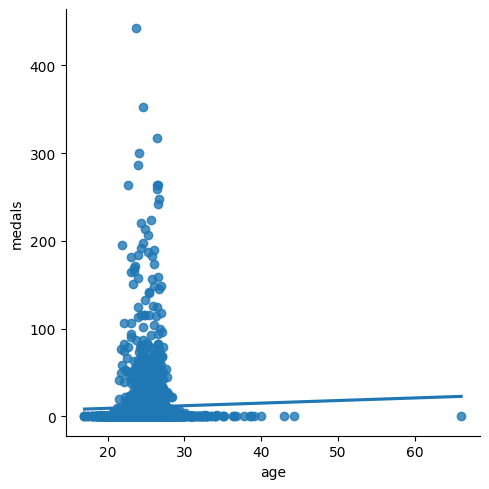

In [13]:
sns.lmplot(x="age", y="medals", data=df, fit_reg =True, ci=None)

In [14]:
df[df.isnull().any(axis=1)]

,country,year,athletes,age,medals,prev_medals
19,Albania,1992,9,25.3,0,NaN
26,Algeria,1964,7,26.0,0,NaN
39,Andorra,1976,3,28.3,0,NaN
50,Angola,1980,17,17.4,0,NaN
59,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...
2092,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,North Yemen,1984,3,27.7,0,NaN
2105,Yemen,1992,8,19.6,0,NaN
2112,South Yemen,1988,5,23.6,0,NaN


In [15]:
df = df.dropna()
df

,country,year,athletes,age,medals,prev_medals
0,Afghanistan,1964,8,22.0,0,0.0
1,Afghanistan,1968,5,23.2,0,0.0
2,Afghanistan,1972,8,29.0,0,0.0
3,Afghanistan,1980,11,23.6,0,0.0
4,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...
2139,Zimbabwe,2000,26,25.0,0,0.0
2140,Zimbabwe,2004,14,25.1,3,0.0
2141,Zimbabwe,2008,16,26.1,4,3.0
2142,Zimbabwe,2012,9,27.3,0,4.0


In [16]:
train = df[df["year"] < 2012].copy()
test = df[df["year"] >= 2012].copy()

In [17]:
train.shape

(1609, 6)

In [18]:
test.shape

(405, 6)

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [20]:
predictor = ["athletes","prev_medals"]
target = "medals"

In [21]:
reg.fit(train[predictor], train[target])

LinearRegression()

In [22]:
predictions = reg.predict(test[predictor])
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [23]:
test ["predictions"] = predictions
test

,country,year,athletes,age,medals,prev_medals,predictions
6,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,Albania,2012,10,25.7,0,0.0,-1.425032
25,Albania,2016,6,23.7,0,0.0,-1.711847
37,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...
2111,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [24]:
test.loc[test["predictions"]<0, "predictions"]= 0

In [25]:
test["predictions"] = test["predictions"].round()
test

,country,year,athletes,age,medals,prev_medals,predictions
6,Afghanistan,2012,6,24.8,1,1.0,0.0
7,Afghanistan,2016,3,24.7,0,1.0,0.0
24,Albania,2012,10,25.7,0,0.0,0.0
25,Albania,2016,6,23.7,0,0.0,0.0
37,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...
2111,Yemen,2016,3,19.3,0,0.0,0.0
2131,Zambia,2012,7,22.6,0,0.0,0.0
2132,Zambia,2016,7,24.1,0,0.0,0.0
2142,Zimbabwe,2012,9,27.3,0,4.0,2.0


In [26]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test[target], test["predictions"])


In [27]:
error

3.2987654320987656

In [28]:
df.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [29]:
test[test["country"] == "Indonesia"]

,country,year,athletes,age,medals,prev_medals,predictions
893,Indonesia,2012,22,23.5,2,7.0,5.0
894,Indonesia,2016,31,24.5,4,2.0,2.0


In [30]:
errors = (test[target] - test["predictions"]).abs()
errors

,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


In [31]:
error_by_team = errors.groupby(test["country"]).mean()
error_by_team

,0
country,
Afghanistan,0.5
Albania,0.0
Algeria,1.5
American Samoa,0.0
Andorra,0.0
...,...
Venezuela,3.5
Vietnam,1.0
Yemen,0.0


In [32]:
medals_by_team = test["medals"].groupby(test["country"]).mean()

In [33]:
error_ratio = error_by_team / medals_by_team

In [34]:
error_ratio

,0
country,
Afghanistan,1.00
Albania,NaN
Algeria,1.00
American Samoa,NaN
Andorra,NaN
...,...
Venezuela,1.75
Vietnam,1.00
Yemen,NaN


In [35]:
error_ratio[~pd.isnull(error_ratio)]

,0
country,
Afghanistan,1.000000
Algeria,1.000000
Argentina,0.853659
Armenia,0.428571
Australia,0.367347
...,...
United States,0.126953
Uzbekistan,0.625000
Venezuela,1.750000


In [36]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [37]:
error_ratio

,0
country,
Afghanistan,1.000000
Algeria,1.000000
Argentina,0.853659
Armenia,0.428571
Australia,0.367347
...,...
United Arab Emirates,1.000000
United States,0.126953
Uzbekistan,0.625000


<Axes: ylabel='Frequency'>

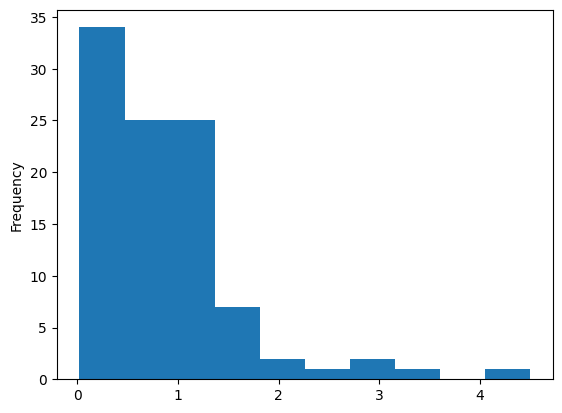

In [38]:
error_ratio.plot.hist()

In [39]:
error_ratio.sort_values()

,0
country,
France,0.022472
Canada,0.048387
New Zealand,0.063492
Russia,0.082353
Switzerland-1,0.090909
...,...
Egypt,2.400000
Switzerland,2.750000
Hong Kong,3.000000
